# Experiments Analysis

---

In this notebook, we are going to do an analysis of the fourth experiments we have made in the previous notebooks. More precisely, we are going to observe the influence of initial learning rate for training session of our model, and, after that, choose the best option.

As a reminder, to tackle the challenge proposed by this study, we have decided to mobilize **Detectron2** and to pick up a Faster/Mask R-CNN COCO instance segmentation model, with ResNet/FPN backbone combination, based on ResNet-50 model and with a learning rate scheduler of 3: We have chosen this one because it obtains the best speed/accuracy tradeoff.

In the four experiments, we have tested four different initial learning rates: 0.025, 0.0025, 0.00025 and 0.000025.

Below, we are going to compare the following metrics during training session, for both object detection and segmentation:
* Total loss;
* Global average precision;
* Average precision for type 1 defect;
* Average precision for type 2 defect;
* Average precision for type 3 defect;
* Average precision for type 4 defect.

Clearly, we are not going to check all the metrics classically mobilized to measure object detectors or image segmentation models performances.

Most important, here, we are not going to follow recall metrics: As these ones are not given *out of the box* during Detectron2 training sessions, we haven't recorded them. Nonetheless, please, note that these metrics are important ones.

As always, the prerequisite step consists on loading the appropriate packages to perform our work:

In [1]:
# Needed packages imports:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib as mpl
import matplotlib.pyplot as plt
import json

---

## Work preparation

In [2]:
# Get training session metrics for the four experiments:

# Experiment 1:
metrics_1 = []
with open('../models/experiment_1/training/metrics.json', 'r') as f:
    for l in f:
        metrics_1.append(json.loads(l))

# Experiment 2:
metrics_2 = []
with open('../models/experiment_2/training/metrics.json', 'r') as f:
    for l in f:
        metrics_2.append(json.loads(l))

# Experiment 3:
metrics_3 = []
with open('../models/experiment_3/training/metrics.json', 'r') as f:
    for l in f:
        metrics_3.append(json.loads(l))

# Experiment 4:
metrics_4 = []
with open('../models/experiment_4/training/metrics.json', 'r') as f:
    for l in f:
        metrics_4.append(json.loads(l))

In [3]:
# Get iterations:

# Experiment 1:
iteration_1 = []
for recording in metrics_1:
    iteration = recording['iteration']
    iteration_1.append(iteration)

# Experiment 2:
iteration_2 = []
for recording in metrics_2:
    iteration = recording['iteration']
    iteration_2.append(iteration)

# Experiment 3:
iteration_3 = []
for recording in metrics_3:
    iteration = recording['iteration']
    iteration_3.append(iteration)

# Experiment 4:
iteration_4 = []
for recording in metrics_4:
    iteration = recording['iteration']
    iteration_4.append(iteration)

In [4]:
# Check iteration recordings:
print("*** Iteration recordings:")
print("- Experiment 1: {}".format(iteration_1))
print("- Experiment 2: {}".format(iteration_2))
print("- Experiment 3: {}".format(iteration_3))
print("- Experiment 4: {}".format(iteration_4))

*** Iteration recordings:
- Experiment 1: [19, 39, 59, 79, 99, 119, 139, 159, 179, 199, 219, 239, 259, 279, 299, 319, 339, 359, 379, 399]
- Experiment 2: [19, 39, 59, 79, 99, 119, 139, 159, 179, 199, 219, 239, 259, 279, 299, 319, 339, 359, 379, 399]
- Experiment 3: [19, 39, 59, 79, 99, 119, 139, 159, 179, 199, 219, 239, 259, 279, 299, 319, 339, 359, 379, 399]
- Experiment 4: [19, 39, 59, 79, 99, 119, 139, 159, 179, 199, 219, 239, 259, 279, 299, 319, 339, 359, 379, 399]


In [5]:
# Get total loss:

# Experiment 1:
total_loss_1 = []
for recording in metrics_1:
    total_loss = recording['total_loss']
    total_loss_1.append(total_loss)

# Experiment 2:
total_loss_2 = []
for recording in metrics_2:
    total_loss = recording['total_loss']
    total_loss_2.append(total_loss)

# Experiment 3:
total_loss_3 = []
for recording in metrics_3:
    total_loss = recording['total_loss']
    total_loss_3.append(total_loss)

# Experiment 4:
total_loss_4 = []
for recording in metrics_4:
    total_loss = recording['total_loss']
    total_loss_4.append(total_loss)

In [6]:
# Check total loss recordings:
print("*** Total loss recordings:")
print("- Experiment 1: from {:.2f} to {:.2f}".format(min(total_loss_1), max(total_loss_1)))
print("- Experiment 2: from {:.2f} to {:.2f}".format(min(total_loss_2), max(total_loss_2)))
print("- Experiment 3: from {:.2f} to {:.2f}".format(min(total_loss_3), max(total_loss_3)))
print("- Experiment 4: from {:.2f} to {:.2f}".format(min(total_loss_4), max(total_loss_4)))

*** Total loss recordings:
- Experiment 1: from 1.42 to 4.41
- Experiment 2: from 1.13 to 3.56
- Experiment 3: from 1.10 to 2.55
- Experiment 4: from 1.64 to 4.31


In [7]:
# Get object detection metrics:

# Experiment 1:
od_ap_1 = []
od_ap_1_1 = []
od_ap_2_1 = []
od_ap_3_1 = []
od_ap_4_1 = []
for recording in metrics_1:
    od_ap_1.append(recording['bbox/AP'])
    od_ap_1_1.append(recording['bbox/AP-Type 1'])
    od_ap_2_1.append(recording['bbox/AP-Type 2'])
    od_ap_3_1.append(recording['bbox/AP-Type 3'])
    od_ap_4_1.append(recording['bbox/AP-Type 4'])
    
# Experiment 2:
od_ap_2 = []
od_ap_1_2 = []
od_ap_2_2 = []
od_ap_3_2 = []
od_ap_4_2 = []
for recording in metrics_2:
    od_ap_2.append(recording['bbox/AP'])
    od_ap_1_2.append(recording['bbox/AP-Type 1'])
    od_ap_2_2.append(recording['bbox/AP-Type 2'])
    od_ap_3_2.append(recording['bbox/AP-Type 3'])
    od_ap_4_2.append(recording['bbox/AP-Type 4'])
    
# Experiment 3:
od_ap_3 = []
od_ap_1_3 = []
od_ap_2_3 = []
od_ap_3_3 = []
od_ap_4_3 = []
for recording in metrics_3:
    od_ap_3.append(recording['bbox/AP'])
    od_ap_1_3.append(recording['bbox/AP-Type 1'])
    od_ap_2_3.append(recording['bbox/AP-Type 2'])
    od_ap_3_3.append(recording['bbox/AP-Type 3'])
    od_ap_4_3.append(recording['bbox/AP-Type 4'])
    
# Experiment 4:
od_ap_4 = []
od_ap_1_4 = []
od_ap_2_4 = []
od_ap_3_4 = []
od_ap_4_4 = []
for recording in metrics_4:
    od_ap_4.append(recording['bbox/AP'])
    od_ap_1_4.append(recording['bbox/AP-Type 1'])
    od_ap_2_4.append(recording['bbox/AP-Type 2'])
    od_ap_3_4.append(recording['bbox/AP-Type 3'])
    od_ap_4_4.append(recording['bbox/AP-Type 4'])

In [8]:
# Check object detection recordings:
print("*** Object detection recordings:\n")
print("- Experiment 1:")
print("AP: from {:.2f}% to {:.2f}%".format(min(od_ap_1), max(od_ap_1)))
print("AP Type 1: from {:.2f}% to {:.2f}%".format(min(od_ap_1_1), max(od_ap_1_1)))
print("AP Type 2: from {:.2f}% to {:.2f}%".format(min(od_ap_2_1), max(od_ap_2_1)))
print("AP Type 3: from {:.2f}% to {:.2f}%".format(min(od_ap_3_1), max(od_ap_3_1)))
print("AP Type 4: from {:.2f}% to {:.2f}%".format(min(od_ap_4_1), max(od_ap_4_1)))
print("\n- Experiment 2:")
print("AP: from {:.2f}% to {:.2f}%".format(min(od_ap_2), max(od_ap_2)))
print("AP Type 1: from {:.2f}% to {:.2f}%".format(min(od_ap_1_2), max(od_ap_1_2)))
print("AP Type 2: from {:.2f}% to {:.2f}%".format(min(od_ap_2_2), max(od_ap_2_2)))
print("AP Type 3: from {:.2f}% to {:.2f}%".format(min(od_ap_3_2), max(od_ap_3_2)))
print("AP Type 4: from {:.2f}% to {:.2f}%".format(min(od_ap_4_2), max(od_ap_4_2)))
print("\n- Experiment 3:")
print("AP: from {:.2f}% to {:.2f}%".format(min(od_ap_3), max(od_ap_3)))
print("AP Type 1: from {:.2f}% to {:.2f}%".format(min(od_ap_1_3), max(od_ap_1_3)))
print("AP Type 2: from {:.2f}% to {:.2f}%".format(min(od_ap_2_3), max(od_ap_2_3)))
print("AP Type 3: from {:.2f}% to {:.2f}%".format(min(od_ap_3_3), max(od_ap_3_3)))
print("AP Type 4: from {:.2f}% to {:.2f}%".format(min(od_ap_4_3), max(od_ap_4_3)))
print("\n- Experiment 4:")
print("AP: from {:.2f}% to {:.2f}%".format(min(od_ap_4), max(od_ap_4)))
print("AP Type 1: from {:.2f}% to {:.2f}%".format(min(od_ap_1_4), max(od_ap_1_4)))
print("AP Type 2: from {:.2f}% to {:.2f}%".format(min(od_ap_2_4), max(od_ap_2_4)))
print("AP Type 3: from {:.2f}% to {:.2f}%".format(min(od_ap_3_4), max(od_ap_3_4)))
print("AP Type 4: from {:.2f}% to {:.2f}%".format(min(od_ap_4_4), max(od_ap_4_4)))

*** Object detection recordings:

- Experiment 1:
AP: from 0.01% to 2.85%
AP Type 1: from 0.00% to 0.08%
AP Type 2: from 0.00% to 0.00%
AP Type 3: from 0.04% to 9.73%
AP Type 4: from 0.00% to 1.57%

- Experiment 2:
AP: from 0.01% to 7.80%
AP Type 1: from 0.01% to 3.10%
AP Type 2: from 0.00% to 0.10%
AP Type 3: from 0.01% to 16.66%
AP Type 4: from 0.03% to 13.52%

- Experiment 3:
AP: from 0.73% to 5.35%
AP Type 1: from 0.04% to 1.94%
AP Type 2: from 0.00% to 0.12%
AP Type 3: from 1.03% to 13.02%
AP Type 4: from 0.75% to 8.77%

- Experiment 4:
AP: from 0.10% to 0.72%
AP Type 1: from 0.00% to 0.01%
AP Type 2: from 0.00% to 0.00%
AP Type 3: from 0.00% to 0.26%
AP Type 4: from 0.41% to 2.63%


In [9]:
# Get segmentation metrics:

# Experiment 1:
seg_ap_1 = []
seg_ap_1_1 = []
seg_ap_2_1 = []
seg_ap_3_1 = []
seg_ap_4_1 = []
for recording in metrics_1:
    seg_ap_1.append(recording['segm/AP'])
    seg_ap_1_1.append(recording['segm/AP-Type 1'])
    seg_ap_2_1.append(recording['segm/AP-Type 2'])
    seg_ap_3_1.append(recording['segm/AP-Type 3'])
    seg_ap_4_1.append(recording['segm/AP-Type 4'])
    
# Experiment 2:
seg_ap_2 = []
seg_ap_1_2 = []
seg_ap_2_2 = []
seg_ap_3_2 = []
seg_ap_4_2 = []
for recording in metrics_2:
    seg_ap_2.append(recording['segm/AP'])
    seg_ap_1_2.append(recording['segm/AP-Type 1'])
    seg_ap_2_2.append(recording['segm/AP-Type 2'])
    seg_ap_3_2.append(recording['segm/AP-Type 3'])
    seg_ap_4_2.append(recording['segm/AP-Type 4'])
    
# Experiment 3:
seg_ap_3 = []
seg_ap_1_3 = []
seg_ap_2_3 = []
seg_ap_3_3 = []
seg_ap_4_3 = []
for recording in metrics_3:
    seg_ap_3.append(recording['segm/AP'])
    seg_ap_1_3.append(recording['segm/AP-Type 1'])
    seg_ap_2_3.append(recording['segm/AP-Type 2'])
    seg_ap_3_3.append(recording['segm/AP-Type 3'])
    seg_ap_4_3.append(recording['segm/AP-Type 4'])
    
# Experiment 4:
seg_ap_4 = []
seg_ap_1_4 = []
seg_ap_2_4 = []
seg_ap_3_4 = []
seg_ap_4_4 = []
for recording in metrics_4:
    seg_ap_4.append(recording['segm/AP'])
    seg_ap_1_4.append(recording['segm/AP-Type 1'])
    seg_ap_2_4.append(recording['segm/AP-Type 2'])
    seg_ap_3_4.append(recording['segm/AP-Type 3'])
    seg_ap_4_4.append(recording['segm/AP-Type 4'])

In [10]:
# Check segmentation recordings:
print("*** Segmentation recordings:\n")
print("- Experiment 1:")
print("AP: from {:.2f}% to {:.2f}%".format(min(seg_ap_1), max(seg_ap_1)))
print("AP Type 1: from {:.2f}% to {:.2f}%".format(min(seg_ap_1_1), max(seg_ap_1_1)))
print("AP Type 2: from {:.2f}% to {:.2f}%".format(min(seg_ap_2_1), max(seg_ap_2_1)))
print("AP Type 3: from {:.2f}% to {:.2f}%".format(min(seg_ap_3_1), max(seg_ap_3_1)))
print("AP Type 4: from {:.2f}% to {:.2f}%".format(min(seg_ap_4_1), max(seg_ap_4_1)))
print("\n- Experiment 2:")
print("AP: from {:.2f}% to {:.2f}%".format(min(seg_ap_2), max(seg_ap_2)))
print("AP Type 1: from {:.2f}% to {:.2f}%".format(min(seg_ap_1_2), max(seg_ap_1_2)))
print("AP Type 2: from {:.2f}% to {:.2f}%".format(min(seg_ap_2_2), max(seg_ap_2_2)))
print("AP Type 3: from {:.2f}% to {:.2f}%".format(min(seg_ap_3_2), max(seg_ap_3_2)))
print("AP Type 4: from {:.2f}% to {:.2f}%".format(min(seg_ap_4_2), max(seg_ap_4_2)))
print("\n- Experiment 3:")
print("AP: from {:.2f}% to {:.2f}%".format(min(seg_ap_3), max(seg_ap_3)))
print("AP Type 1: from {:.2f}% to {:.2f}%".format(min(seg_ap_1_3), max(seg_ap_1_3)))
print("AP Type 2: from {:.2f}% to {:.2f}%".format(min(seg_ap_2_3), max(seg_ap_2_3)))
print("AP Type 3: from {:.2f}% to {:.2f}%".format(min(seg_ap_3_3), max(seg_ap_3_3)))
print("AP Type 4: from {:.2f}% to {:.2f}%".format(min(seg_ap_4_3), max(seg_ap_4_3)))
print("\n- Experiment 4:")
print("AP: from {:.2f}% to {:.2f}%".format(min(seg_ap_4), max(seg_ap_4)))
print("AP Type 1: from {:.2f}% to {:.2f}%".format(min(seg_ap_1_4), max(seg_ap_1_4)))
print("AP Type 2: from {:.2f}% to {:.2f}%".format(min(seg_ap_2_4), max(seg_ap_2_4)))
print("AP Type 3: from {:.2f}% to {:.2f}%".format(min(seg_ap_3_4), max(seg_ap_3_4)))
print("AP Type 4: from {:.2f}% to {:.2f}%".format(min(seg_ap_4_4), max(seg_ap_4_4)))

*** Segmentation recordings:

- Experiment 1:
AP: from 0.00% to 2.91%
AP Type 1: from 0.00% to 0.08%
AP Type 2: from 0.00% to 0.00%
AP Type 3: from 0.02% to 9.84%
AP Type 4: from 0.00% to 1.74%

- Experiment 2:
AP: from 0.02% to 6.45%
AP Type 1: from 0.00% to 2.69%
AP Type 2: from 0.00% to 0.10%
AP Type 3: from 0.03% to 14.64%
AP Type 4: from 0.03% to 10.28%

- Experiment 3:
AP: from 0.52% to 5.04%
AP Type 1: from 0.02% to 1.68%
AP Type 2: from 0.00% to 0.10%
AP Type 3: from 0.70% to 12.45%
AP Type 4: from 0.41% to 7.89%

- Experiment 4:
AP: from 0.00% to 0.40%
AP Type 1: from 0.00% to 0.01%
AP Type 2: from 0.00% to 0.00%
AP Type 3: from 0.00% to 0.24%
AP Type 4: from 0.00% to 1.38%


---

## Total loss metric

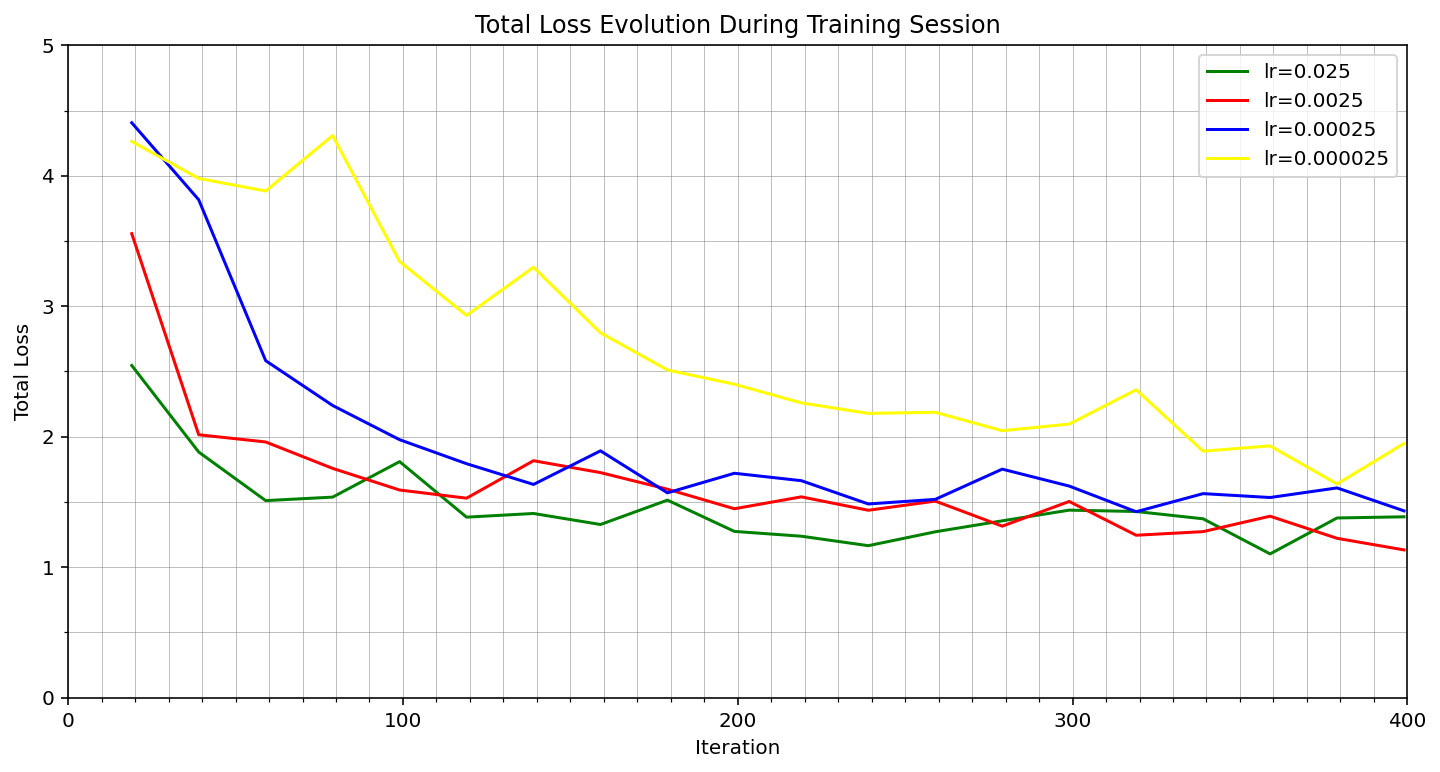

In [11]:
# Define figure:
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title('Total Loss Evolution During Training Session')

# Configuration of the graph:
ax.plot(iteration_3, total_loss_3, color='green', linestyle='solid', label='lr=0.025')
ax.plot(iteration_2, total_loss_2, color='red', linestyle='solid', label='lr=0.0025')
ax.plot(iteration_1, total_loss_1, color='blue', linestyle='solid', label='lr=0.00025')
ax.plot(iteration_4, total_loss_4, color='yellow', linestyle='solid', label='lr=0.000025')
ax.set_xlim(0, 400)
ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(4))
ax.xaxis.set_minor_locator(mpl.ticker.MaxNLocator(40))
ax.set_xlabel('Iteration')
ax.set_ylim(0, 5)
ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(5))
ax.yaxis.set_minor_locator(mpl.ticker.MaxNLocator(10))
ax.set_ylabel('Total Loss')
ax.grid(color="grey", which="major", axis='x', linestyle='solid', linewidth=0.25)
ax.grid(color="grey", which="minor", axis='x', linestyle='solid', linewidth=0.25)
ax.grid(color="grey", which="major", axis='y', linestyle='solid', linewidth=0.25)
ax.grid(color="grey", which="minor", axis='y', linestyle='solid', linewidth=0.25)
ax.legend(loc=1)

# Save figure:
fig.savefig('../graphs/experiments_analysis_total_loss.png', bbox_inches='tight')

---

## Object detection metrics

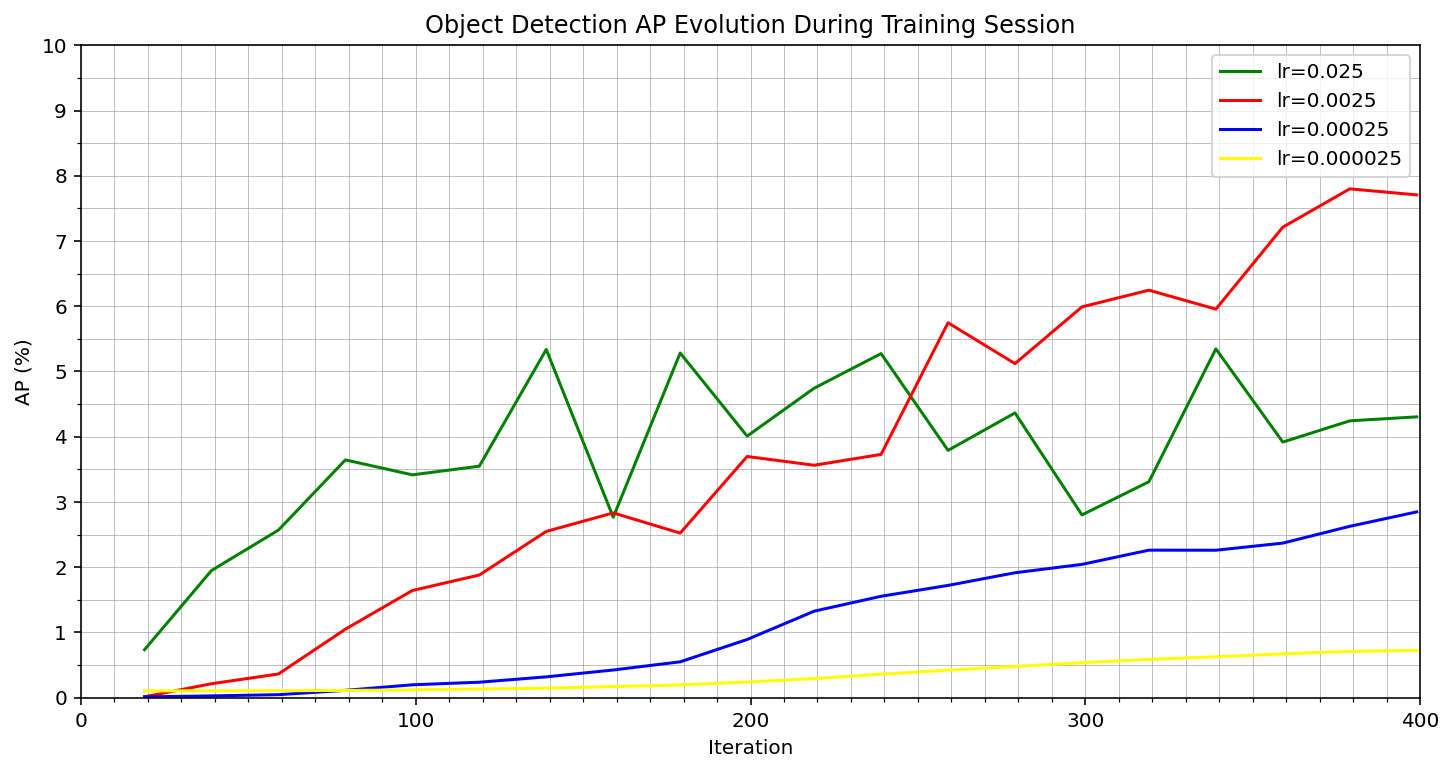

In [12]:
# Define figure:
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title('Object Detection AP Evolution During Training Session')

# Configuration of the graph:
ax.plot(iteration_3, od_ap_3, color='green', linestyle='solid', label='lr=0.025')
ax.plot(iteration_2, od_ap_2, color='red', linestyle='solid', label='lr=0.0025')
ax.plot(iteration_1, od_ap_1, color='blue', linestyle='solid', label='lr=0.00025')
ax.plot(iteration_4, od_ap_4, color='yellow', linestyle='solid', label='lr=0.000025')
ax.set_xlim(0, 400)
ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(4))
ax.xaxis.set_minor_locator(mpl.ticker.MaxNLocator(40))
ax.set_xlabel('Iteration')
ax.set_ylim(0, 10)
ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(10))
ax.yaxis.set_minor_locator(mpl.ticker.MaxNLocator(20))
ax.set_ylabel('AP (%)')
ax.grid(color="grey", which="major", axis='x', linestyle='solid', linewidth=0.25)
ax.grid(color="grey", which="minor", axis='x', linestyle='solid', linewidth=0.25)
ax.grid(color="grey", which="major", axis='y', linestyle='solid', linewidth=0.25)
ax.grid(color="grey", which="minor", axis='y', linestyle='solid', linewidth=0.25)
ax.legend(loc=1)

# Save figure:
fig.savefig('../graphs/experiments_analysis_object_detection_ap.png', bbox_inches='tight')

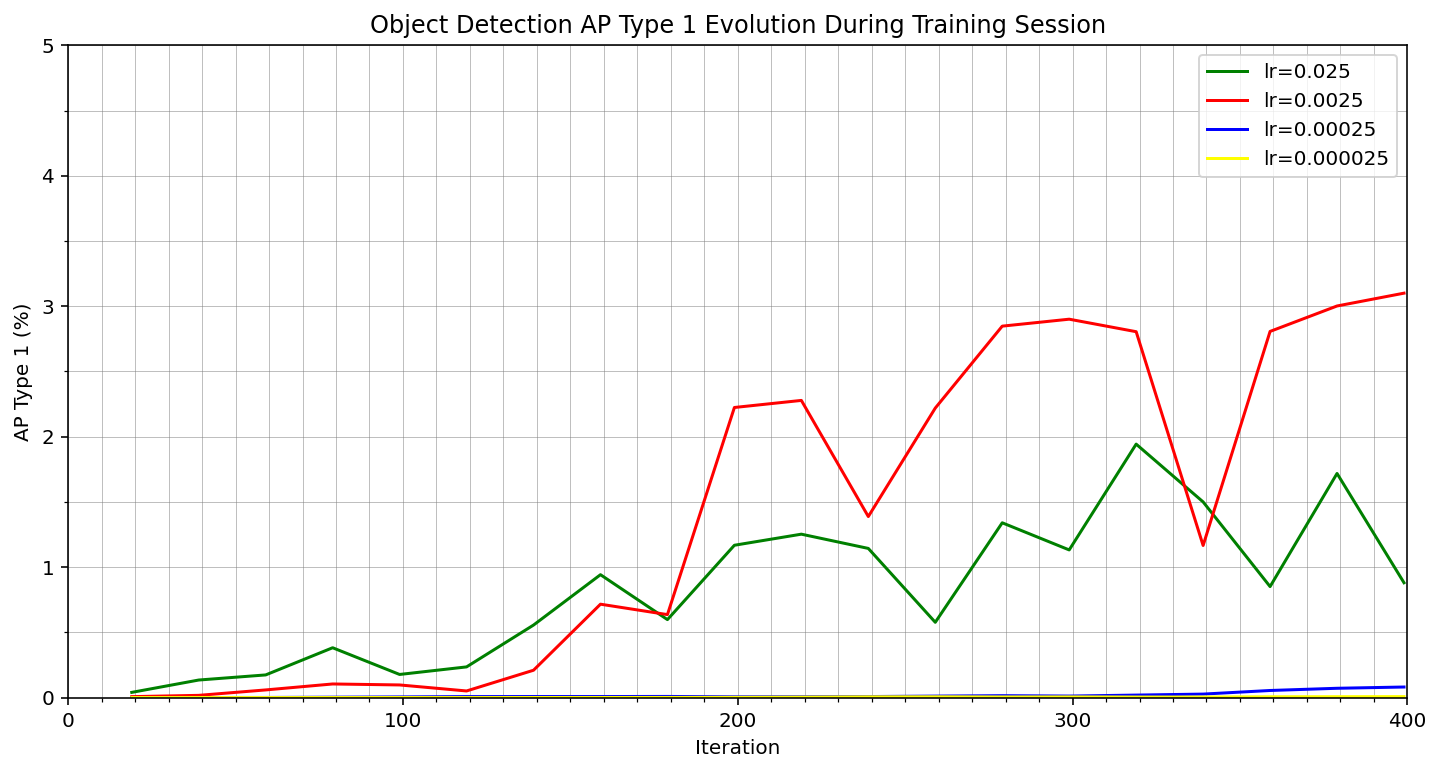

In [13]:
# Define figure:
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title('Object Detection AP Type 1 Evolution During Training Session')

# Configuration of the graph:
ax.plot(iteration_3, od_ap_1_3, color='green', linestyle='solid', label='lr=0.025')
ax.plot(iteration_2, od_ap_1_2, color='red', linestyle='solid', label='lr=0.0025')
ax.plot(iteration_1, od_ap_1_1, color='blue', linestyle='solid', label='lr=0.00025')
ax.plot(iteration_4, od_ap_1_4, color='yellow', linestyle='solid', label='lr=0.000025')
ax.set_xlim(0, 400)
ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(4))
ax.xaxis.set_minor_locator(mpl.ticker.MaxNLocator(40))
ax.set_xlabel('Iteration')
ax.set_ylim(0, 5)
ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(5))
ax.yaxis.set_minor_locator(mpl.ticker.MaxNLocator(10))
ax.set_ylabel('AP Type 1 (%)')
ax.grid(color="grey", which="major", axis='x', linestyle='solid', linewidth=0.25)
ax.grid(color="grey", which="minor", axis='x', linestyle='solid', linewidth=0.25)
ax.grid(color="grey", which="major", axis='y', linestyle='solid', linewidth=0.25)
ax.grid(color="grey", which="minor", axis='y', linestyle='solid', linewidth=0.25)
ax.legend(loc=1)

# Save figure:
fig.savefig('../graphs/experiments_analysis_object_detection_ap_type_1.png', bbox_inches='tight')

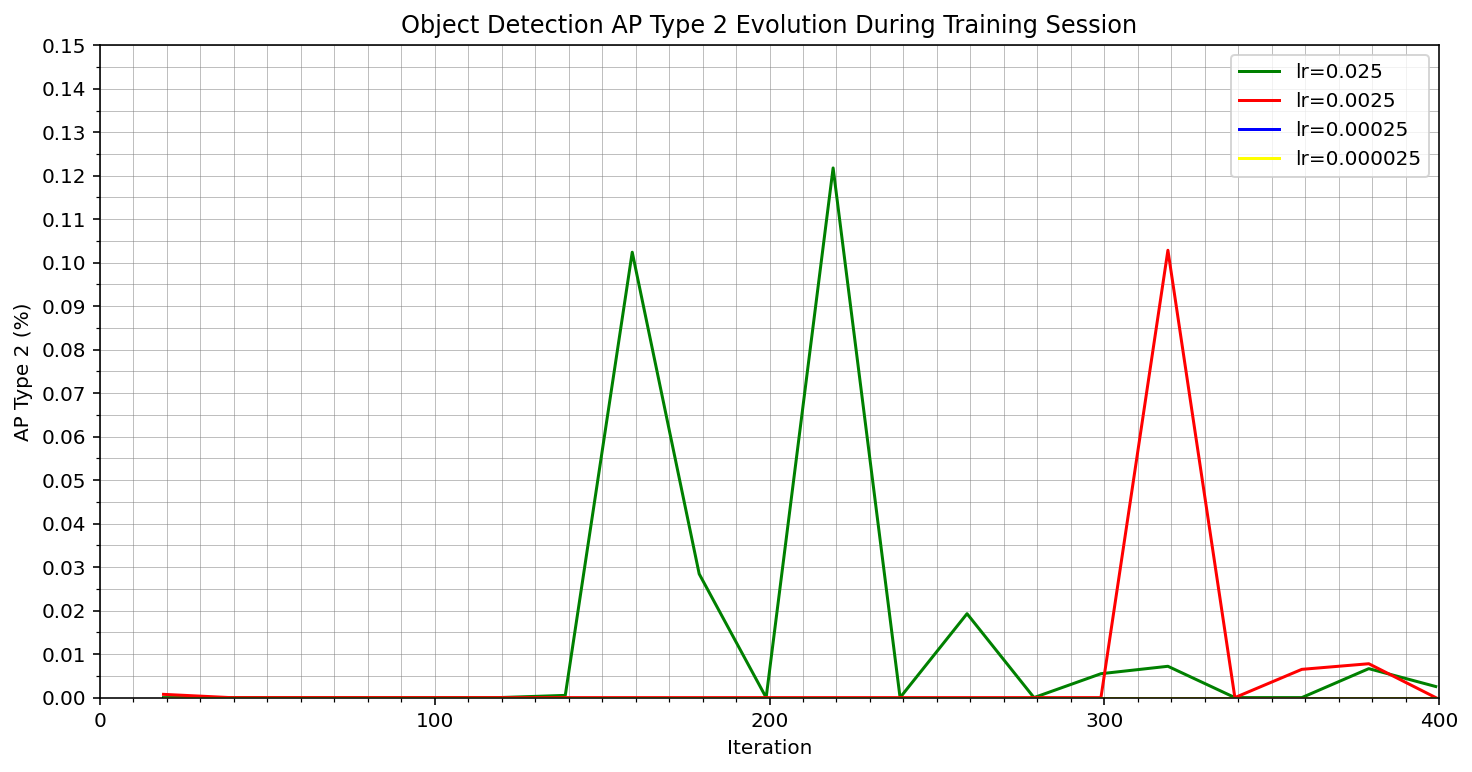

In [14]:
# Define figure:
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title('Object Detection AP Type 2 Evolution During Training Session')

# Configuration of the graph:
ax.plot(iteration_3, od_ap_2_3, color='green', linestyle='solid', label='lr=0.025')
ax.plot(iteration_2, od_ap_2_2, color='red', linestyle='solid', label='lr=0.0025')
ax.plot(iteration_1, od_ap_2_1, color='blue', linestyle='solid', label='lr=0.00025')
ax.plot(iteration_4, od_ap_2_4, color='yellow', linestyle='solid', label='lr=0.000025')
ax.set_xlim(0, 400)
ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(4))
ax.xaxis.set_minor_locator(mpl.ticker.MaxNLocator(40))
ax.set_xlabel('Iteration')
ax.set_ylim(0, 0.15)
ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(15))
ax.yaxis.set_minor_locator(mpl.ticker.MaxNLocator(30))
ax.set_ylabel('AP Type 2 (%)')
ax.grid(color="grey", which="major", axis='x', linestyle='solid', linewidth=0.25)
ax.grid(color="grey", which="minor", axis='x', linestyle='solid', linewidth=0.25)
ax.grid(color="grey", which="major", axis='y', linestyle='solid', linewidth=0.25)
ax.grid(color="grey", which="minor", axis='y', linestyle='solid', linewidth=0.25)
ax.legend(loc=1)

# Save figure:
fig.savefig('../graphs/experiments_analysis_object_detection_ap_type_2.png', bbox_inches='tight')

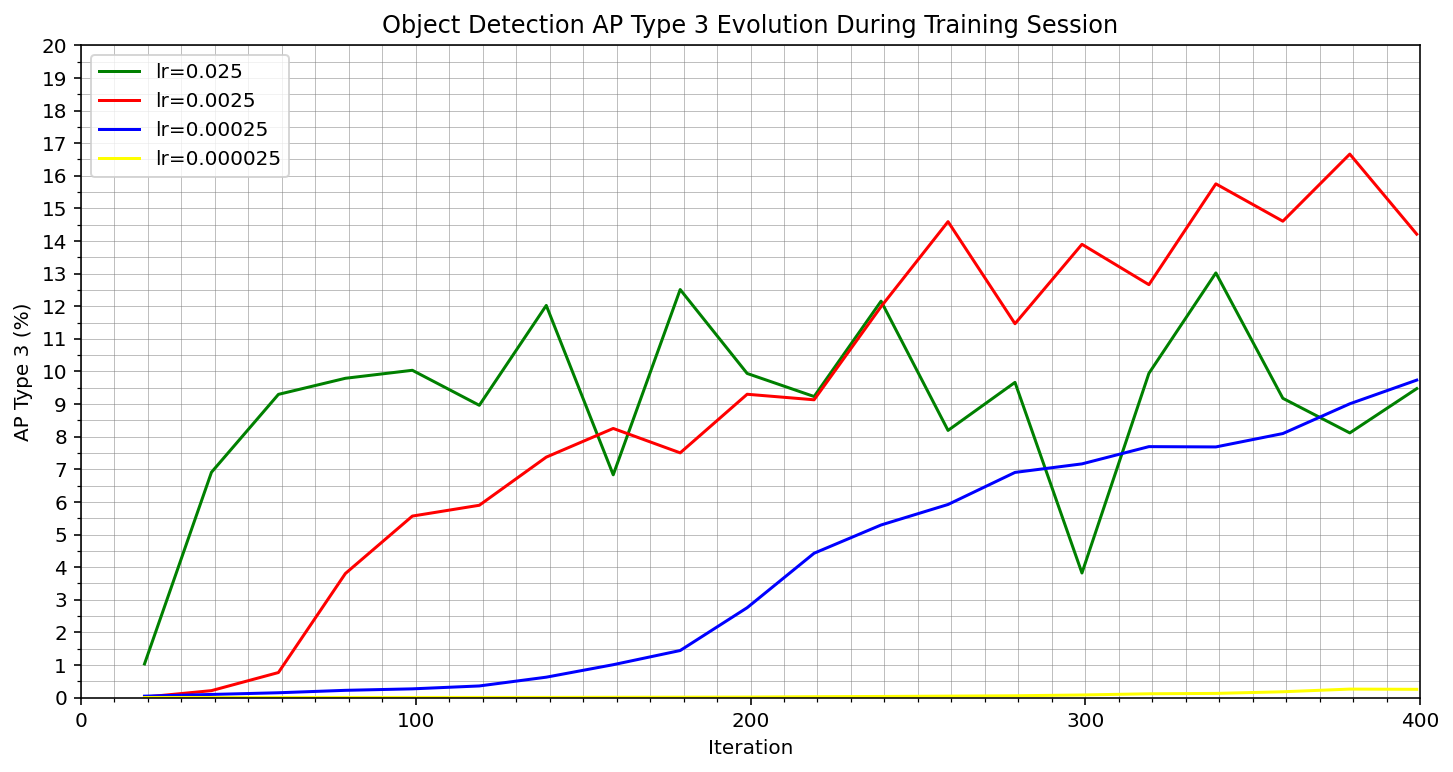

In [15]:
# Define figure:
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title('Object Detection AP Type 3 Evolution During Training Session')

# Configuration of the graph:
ax.plot(iteration_3, od_ap_3_3, color='green', linestyle='solid', label='lr=0.025')
ax.plot(iteration_2, od_ap_3_2, color='red', linestyle='solid', label='lr=0.0025')
ax.plot(iteration_1, od_ap_3_1, color='blue', linestyle='solid', label='lr=0.00025')
ax.plot(iteration_4, od_ap_3_4, color='yellow', linestyle='solid', label='lr=0.000025')
ax.set_xlim(0, 400)
ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(4))
ax.xaxis.set_minor_locator(mpl.ticker.MaxNLocator(40))
ax.set_xlabel('Iteration')
ax.set_ylim(0, 20)
ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(20))
ax.yaxis.set_minor_locator(mpl.ticker.MaxNLocator(40))
ax.set_ylabel('AP Type 3 (%)')
ax.grid(color="grey", which="major", axis='x', linestyle='solid', linewidth=0.25)
ax.grid(color="grey", which="minor", axis='x', linestyle='solid', linewidth=0.25)
ax.grid(color="grey", which="major", axis='y', linestyle='solid', linewidth=0.25)
ax.grid(color="grey", which="minor", axis='y', linestyle='solid', linewidth=0.25)
ax.legend(loc=2)

# Save figure:
fig.savefig('../graphs/experiments_analysis_object_detection_ap_type_3.png', bbox_inches='tight')

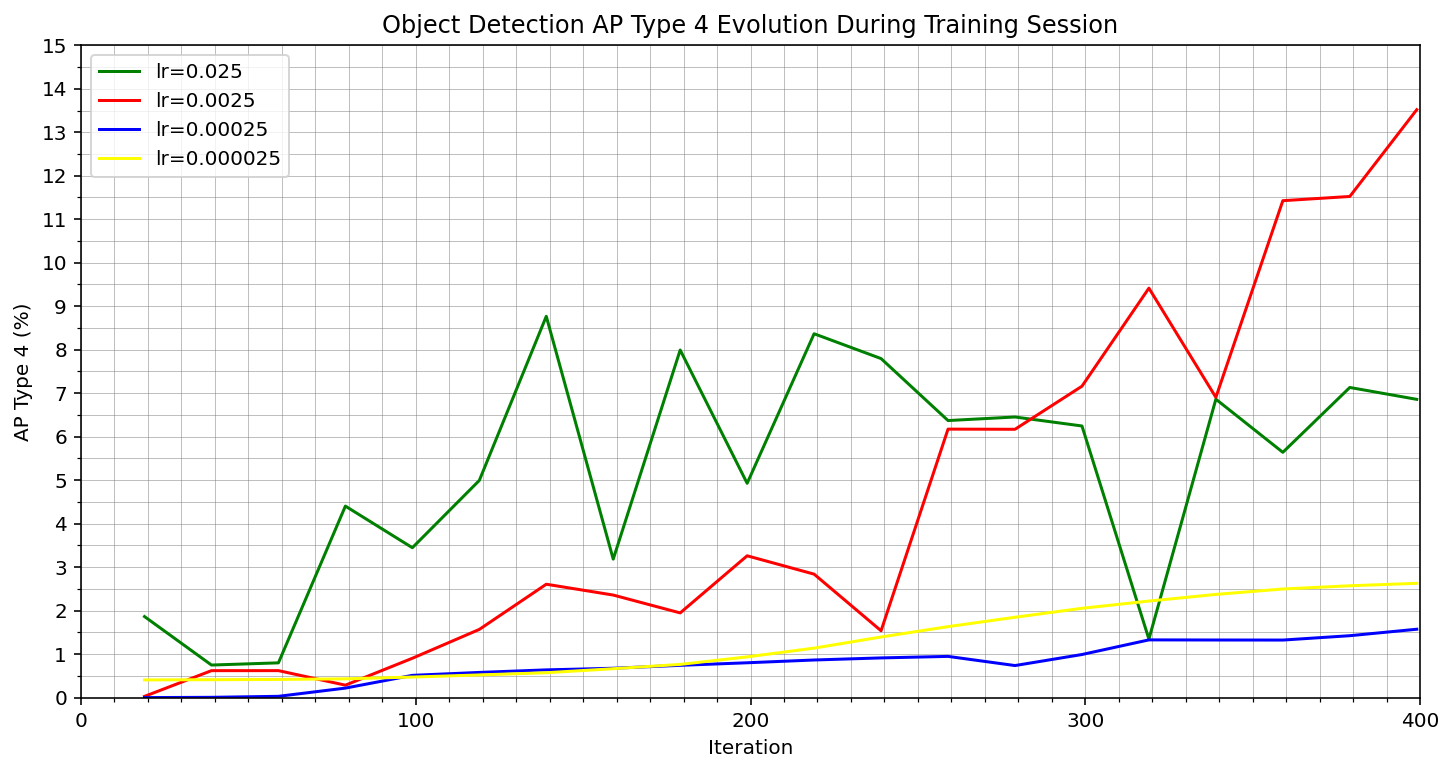

In [16]:
# Define figure:
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title('Object Detection AP Type 4 Evolution During Training Session')

# Configuration of the graph:
ax.plot(iteration_3, od_ap_4_3, color='green', linestyle='solid', label='lr=0.025')
ax.plot(iteration_2, od_ap_4_2, color='red', linestyle='solid', label='lr=0.0025')
ax.plot(iteration_1, od_ap_4_1, color='blue', linestyle='solid', label='lr=0.00025')
ax.plot(iteration_4, od_ap_4_4, color='yellow', linestyle='solid', label='lr=0.000025')
ax.set_xlim(0, 400)
ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(4))
ax.xaxis.set_minor_locator(mpl.ticker.MaxNLocator(40))
ax.set_xlabel('Iteration')
ax.set_ylim(0, 15)
ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(15))
ax.yaxis.set_minor_locator(mpl.ticker.MaxNLocator(30))
ax.set_ylabel('AP Type 4 (%)')
ax.grid(color="grey", which="major", axis='x', linestyle='solid', linewidth=0.25)
ax.grid(color="grey", which="minor", axis='x', linestyle='solid', linewidth=0.25)
ax.grid(color="grey", which="major", axis='y', linestyle='solid', linewidth=0.25)
ax.grid(color="grey", which="minor", axis='y', linestyle='solid', linewidth=0.25)
ax.legend(loc=2)

# Save figure:
fig.savefig('../graphs/experiments_analysis_object_detection_ap_type_4.png', bbox_inches='tight')

---

## Segmentation metrics

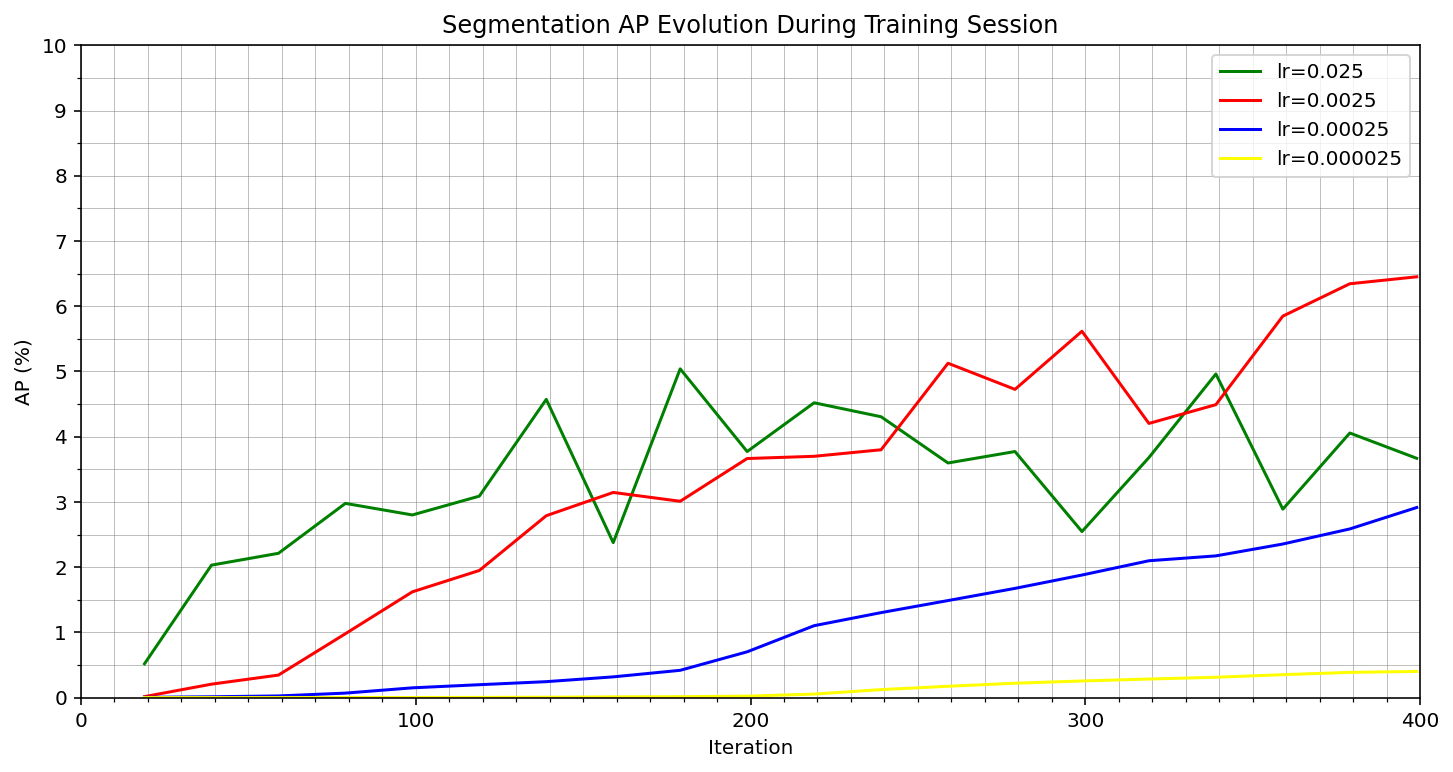

In [17]:
# Define figure:
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title('Segmentation AP Evolution During Training Session')

# Configuration of the graph:
ax.plot(iteration_3, seg_ap_3, color='green', linestyle='solid', label='lr=0.025')
ax.plot(iteration_2, seg_ap_2, color='red', linestyle='solid', label='lr=0.0025')
ax.plot(iteration_1, seg_ap_1, color='blue', linestyle='solid', label='lr=0.00025')
ax.plot(iteration_4, seg_ap_4, color='yellow', linestyle='solid', label='lr=0.000025')
ax.set_xlim(0, 400)
ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(4))
ax.xaxis.set_minor_locator(mpl.ticker.MaxNLocator(40))
ax.set_xlabel('Iteration')
ax.set_ylim(0, 10)
ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(10))
ax.yaxis.set_minor_locator(mpl.ticker.MaxNLocator(20))
ax.set_ylabel('AP (%)')
ax.grid(color="grey", which="major", axis='x', linestyle='solid', linewidth=0.25)
ax.grid(color="grey", which="minor", axis='x', linestyle='solid', linewidth=0.25)
ax.grid(color="grey", which="major", axis='y', linestyle='solid', linewidth=0.25)
ax.grid(color="grey", which="minor", axis='y', linestyle='solid', linewidth=0.25)
ax.legend(loc=1)

# Save figure:
fig.savefig('../graphs/experiments_analysis_segmentation_ap.png', bbox_inches='tight')

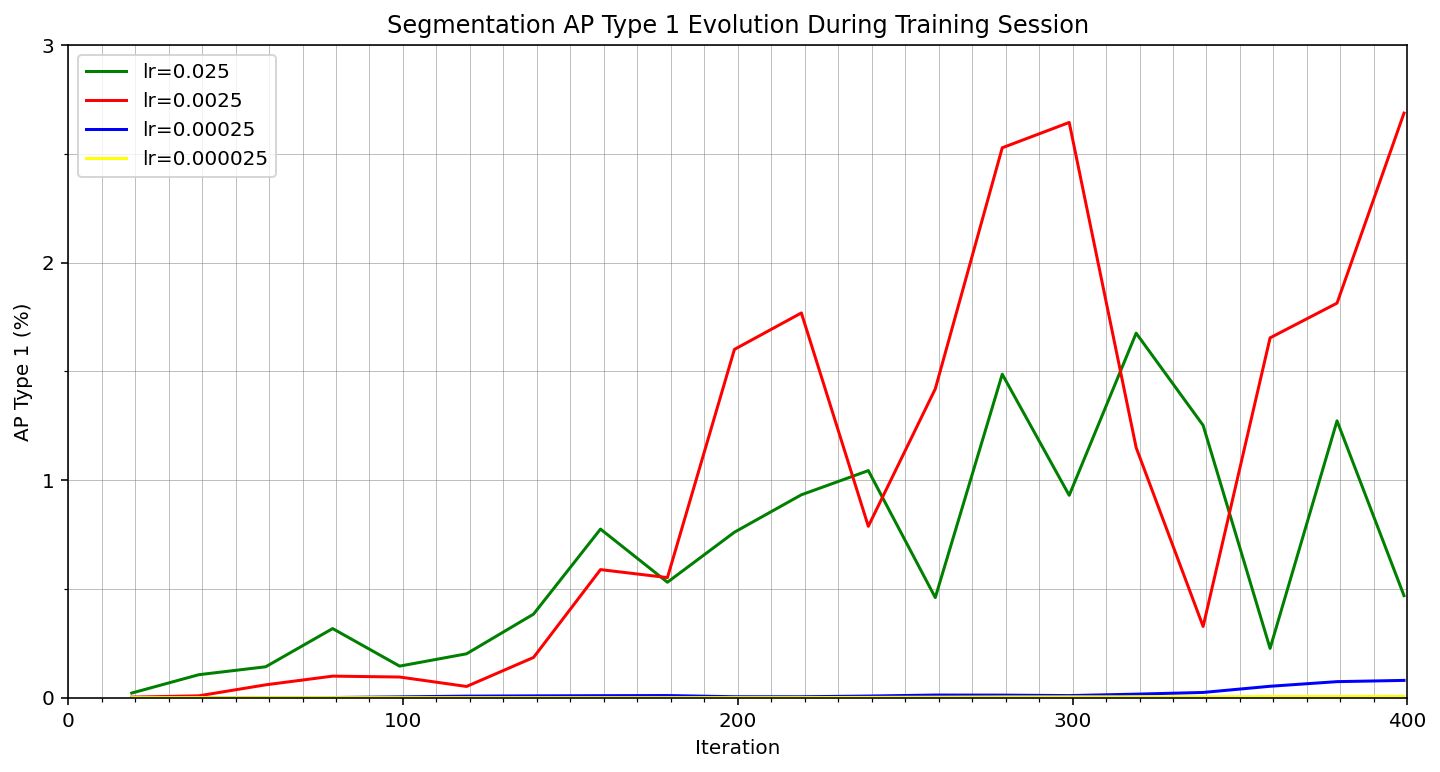

In [18]:
# Define figure:
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title('Segmentation AP Type 1 Evolution During Training Session')

# Configuration of the graph:
ax.plot(iteration_3, seg_ap_1_3, color='green', linestyle='solid', label='lr=0.025')
ax.plot(iteration_2, seg_ap_1_2, color='red', linestyle='solid', label='lr=0.0025')
ax.plot(iteration_1, seg_ap_1_1, color='blue', linestyle='solid', label='lr=0.00025')
ax.plot(iteration_4, seg_ap_1_4, color='yellow', linestyle='solid', label='lr=0.000025')
ax.set_xlim(0, 400)
ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(4))
ax.xaxis.set_minor_locator(mpl.ticker.MaxNLocator(40))
ax.set_xlabel('Iteration')
ax.set_ylim(0, 3)
ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(3))
ax.yaxis.set_minor_locator(mpl.ticker.MaxNLocator(6))
ax.set_ylabel('AP Type 1 (%)')
ax.grid(color="grey", which="major", axis='x', linestyle='solid', linewidth=0.25)
ax.grid(color="grey", which="minor", axis='x', linestyle='solid', linewidth=0.25)
ax.grid(color="grey", which="major", axis='y', linestyle='solid', linewidth=0.25)
ax.grid(color="grey", which="minor", axis='y', linestyle='solid', linewidth=0.25)
ax.legend(loc=2)

# Save figure:
fig.savefig('../graphs/experiments_analysis_segmentation_ap_type_1.png', bbox_inches='tight')

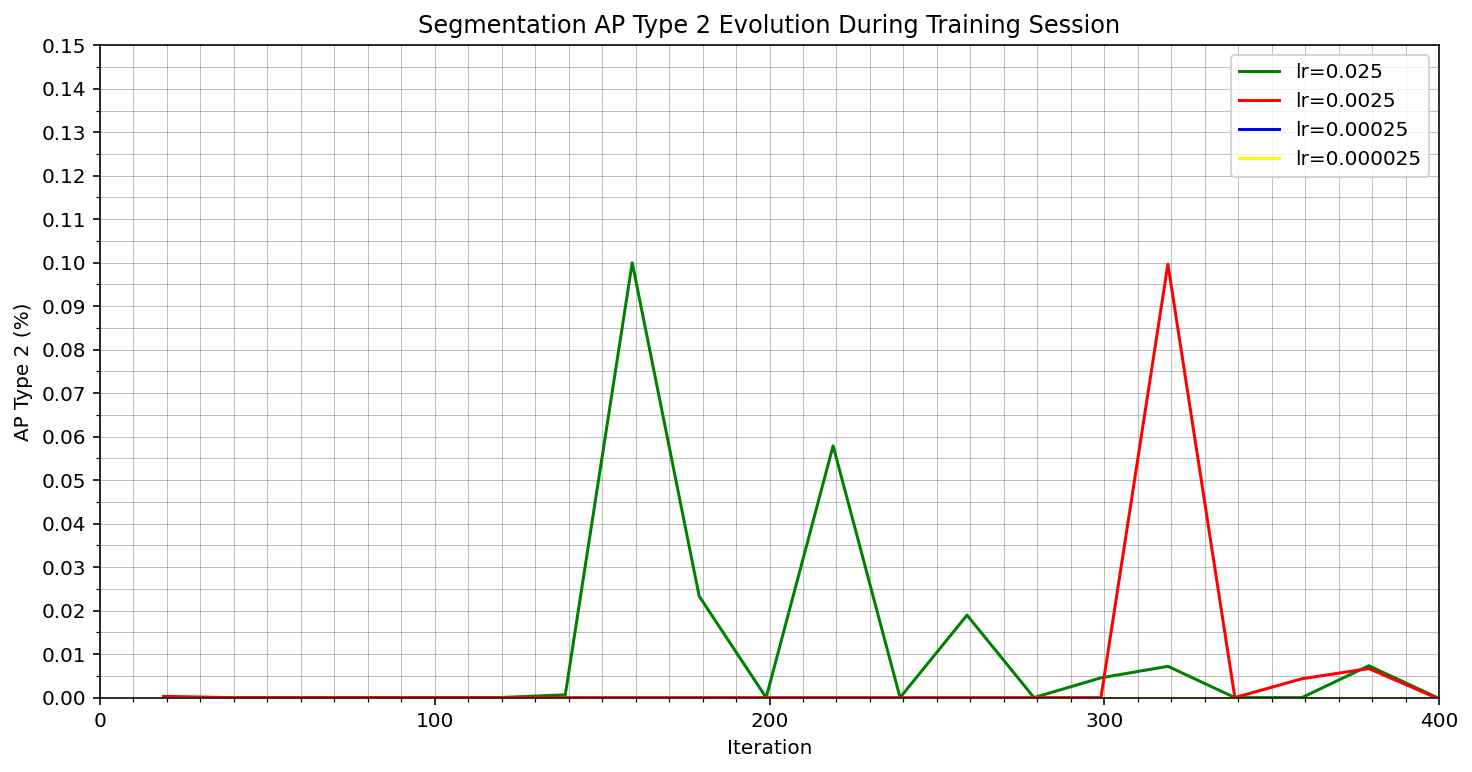

In [19]:
# Define figure:
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title('Segmentation AP Type 2 Evolution During Training Session')

# Configuration of the graph:
ax.plot(iteration_3, seg_ap_2_3, color='green', linestyle='solid', label='lr=0.025')
ax.plot(iteration_2, seg_ap_2_2, color='red', linestyle='solid', label='lr=0.0025')
ax.plot(iteration_1, seg_ap_2_1, color='blue', linestyle='solid', label='lr=0.00025')
ax.plot(iteration_4, seg_ap_2_4, color='yellow', linestyle='solid', label='lr=0.000025')
ax.set_xlim(0, 400)
ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(4))
ax.xaxis.set_minor_locator(mpl.ticker.MaxNLocator(40))
ax.set_xlabel('Iteration')
ax.set_ylim(0, 0.15)
ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(15))
ax.yaxis.set_minor_locator(mpl.ticker.MaxNLocator(30))
ax.set_ylabel('AP Type 2 (%)')
ax.grid(color="grey", which="major", axis='x', linestyle='solid', linewidth=0.25)
ax.grid(color="grey", which="minor", axis='x', linestyle='solid', linewidth=0.25)
ax.grid(color="grey", which="major", axis='y', linestyle='solid', linewidth=0.25)
ax.grid(color="grey", which="minor", axis='y', linestyle='solid', linewidth=0.25)
ax.legend(loc=1)

# Save figure:
fig.savefig('../graphs/experiments_analysis_segmentation_ap_type_2.png', bbox_inches='tight')

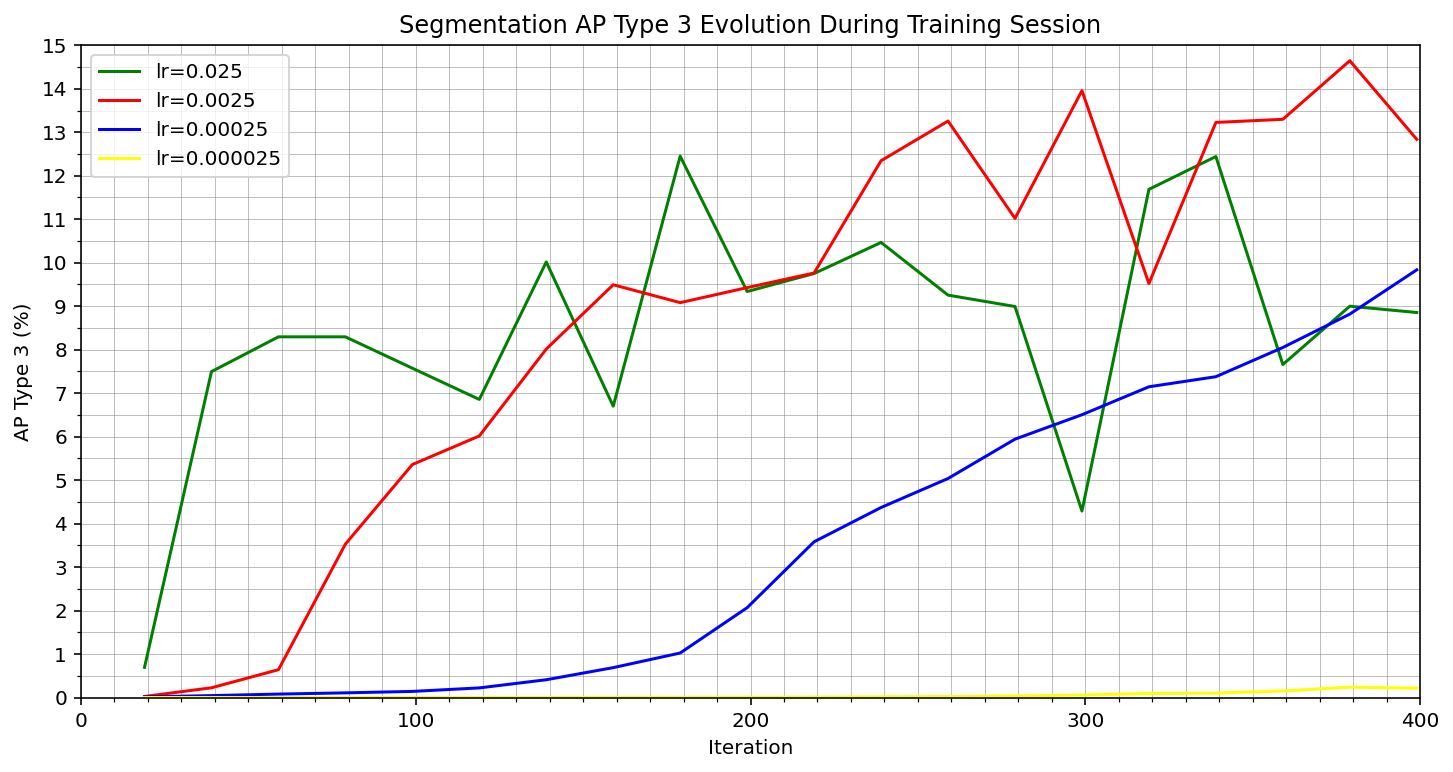

In [20]:
# Define figure:
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title('Segmentation AP Type 3 Evolution During Training Session')

# Configuration of the graph:
ax.plot(iteration_3, seg_ap_3_3, color='green', linestyle='solid', label='lr=0.025')
ax.plot(iteration_2, seg_ap_3_2, color='red', linestyle='solid', label='lr=0.0025')
ax.plot(iteration_1, seg_ap_3_1, color='blue', linestyle='solid', label='lr=0.00025')
ax.plot(iteration_4, seg_ap_3_4, color='yellow', linestyle='solid', label='lr=0.000025')
ax.set_xlim(0, 400)
ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(4))
ax.xaxis.set_minor_locator(mpl.ticker.MaxNLocator(40))
ax.set_xlabel('Iteration')
ax.set_ylim(0, 15)
ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(15))
ax.yaxis.set_minor_locator(mpl.ticker.MaxNLocator(30))
ax.set_ylabel('AP Type 3 (%)')
ax.grid(color="grey", which="major", axis='x', linestyle='solid', linewidth=0.25)
ax.grid(color="grey", which="minor", axis='x', linestyle='solid', linewidth=0.25)
ax.grid(color="grey", which="major", axis='y', linestyle='solid', linewidth=0.25)
ax.grid(color="grey", which="minor", axis='y', linestyle='solid', linewidth=0.25)
ax.legend(loc=2)

# Save figure:
fig.savefig('../graphs/experiments_analysis_segmentation_ap_type_3.png', bbox_inches='tight')

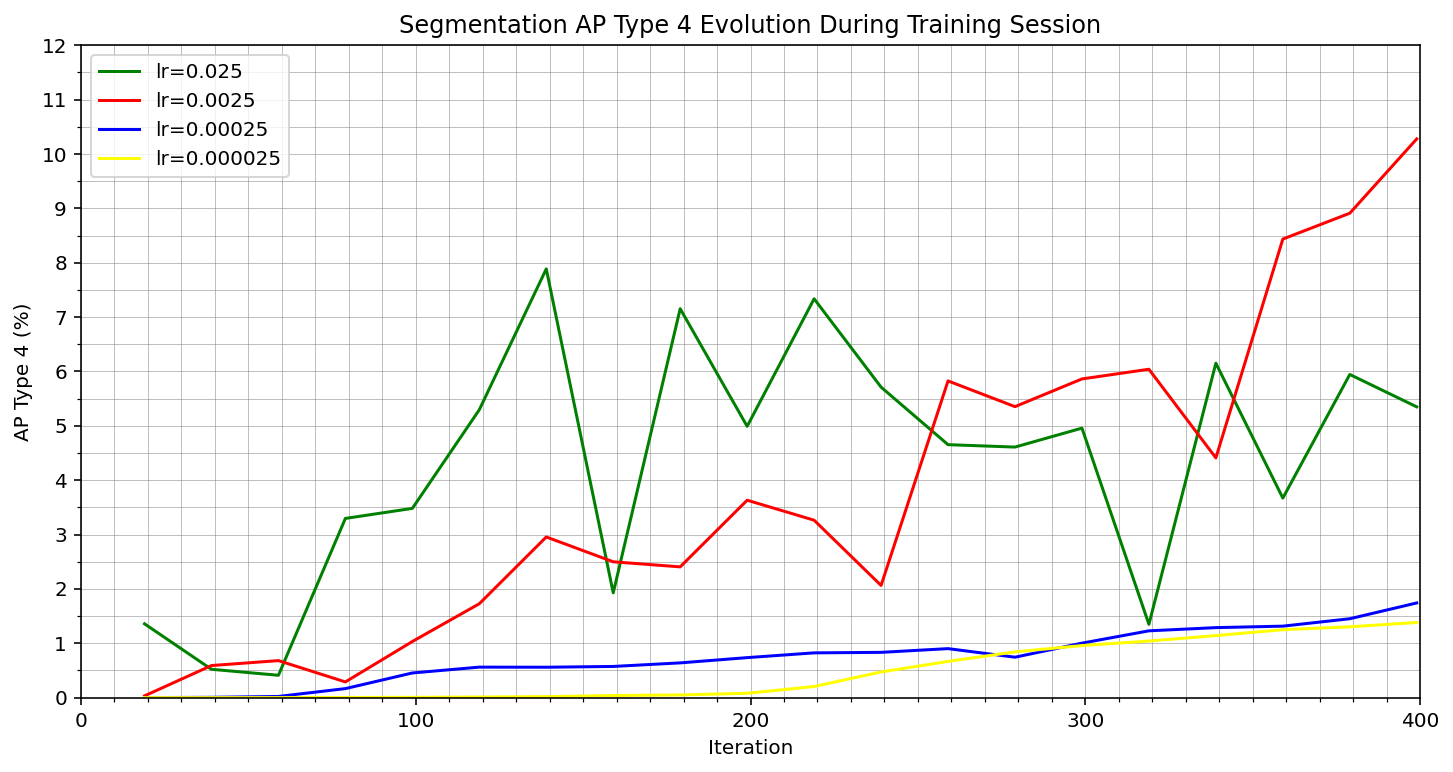

In [21]:
# Define figure:
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title('Segmentation AP Type 4 Evolution During Training Session')

# Configuration of the graph:
ax.plot(iteration_3, seg_ap_4_3, color='green', linestyle='solid', label='lr=0.025')
ax.plot(iteration_2, seg_ap_4_2, color='red', linestyle='solid', label='lr=0.0025')
ax.plot(iteration_1, seg_ap_4_1, color='blue', linestyle='solid', label='lr=0.00025')
ax.plot(iteration_4, seg_ap_4_4, color='yellow', linestyle='solid', label='lr=0.000025')
ax.set_xlim(0, 400)
ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(4))
ax.xaxis.set_minor_locator(mpl.ticker.MaxNLocator(40))
ax.set_xlabel('Iteration')
ax.set_ylim(0, 12)
ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(12))
ax.yaxis.set_minor_locator(mpl.ticker.MaxNLocator(24))
ax.set_ylabel('AP Type 4 (%)')
ax.grid(color="grey", which="major", axis='x', linestyle='solid', linewidth=0.25)
ax.grid(color="grey", which="minor", axis='x', linestyle='solid', linewidth=0.25)
ax.grid(color="grey", which="major", axis='y', linestyle='solid', linewidth=0.25)
ax.grid(color="grey", which="minor", axis='y', linestyle='solid', linewidth=0.25)
ax.legend(loc=2)

# Save figure:
fig.savefig('../graphs/experiments_analysis_segmentation_ap_type_4.png', bbox_inches='tight')

---

## Results analysis

Now we can observe evolution of selected metrics during training sessions, we can do some statements:
* For the 4 initial learning rates we have tested, total loss metric decreases over iterations, thus, we can conclude that the training process is performant.
* For both object detection and segmentation metrics, global AP increases over iterations, this process is "smoother" for learning rates 0.000025 and 0.00025 than for learning rates 0.0025 and 0.025 (discontinuities can be noted), but the increase process is observed in all cases.
* For all 4 defect types, similarly to previous statement, we can observe that specific AP evolution over iterations is a "smoother" process for learning rates 0.000025 and 0.00025 than for learning rates 0.0025 and 0.025, learning rates for which discontinuities can be noted.
* Type 2 defect specific AP remains very low over iterations during training sessions: This can be explained by the fact that this defect type isn't very well spread on initial global dataset (it represents 3.48% of all cases).
* Type 3 defect is the one for which specific AP increasing is the most significant during training sessions: Once again, this can be explained by the fact that this defect type is, this time, very well spread on initial global dataset (it represents 72.59% of all cases).
* It is interesting to note specific AP evolution during training sessions for type 1 defects is less significative than for type 3 defects, despite of the fact that these two defect types repartition on initial global dataset are quite the same (12.64% of all cases for type 1 defects and 11.29% of all cases for type 4 defects): This can perhaps be explained by the fact that, based on the visualizations observed in our first notebook, type 3 defects appear as significantly bigger objects than type 1 defects.

Globally, for long-run training sessions, we can discard learning rates 0.025 and 0.000025 from our chosen possibilities list: For learning rate 0.000025, this is due to the fact that metrics increasing evolution is too slow, whereas for learning rate 0.025, this is due to the fact that we can observe a form of stagnation on metrics increasing evolution.

Learning rates 0.0025 and 0.00025 appear both as two good choices for a long-run training session.